# Customer Behaviour Analysis

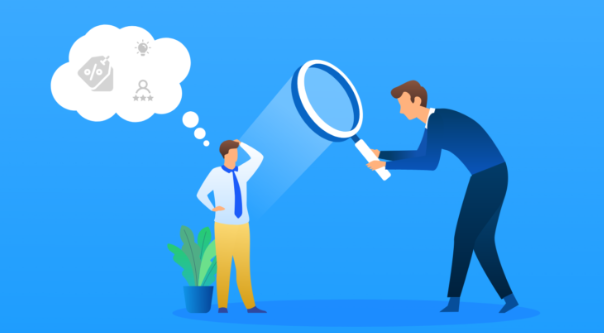

In [20]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing dataset

In [7]:
data = pd.read_csv("ecommerce_customer_data.csv")
data.head()

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2


In [8]:
#Dataset details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                500 non-null    int64 
 1   Gender                 500 non-null    object
 2   Age                    500 non-null    int64 
 3   Location               500 non-null    object
 4   Device_Type            500 non-null    object
 5   Product_Browsing_Time  500 non-null    int64 
 6   Total_Pages_Viewed     500 non-null    int64 
 7   Items_Added_to_Cart    500 non-null    int64 
 8   Total_Purchases        500 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.3+ KB


In [9]:
#Row column
data.shape

(500, 9)

In [10]:
#Null check
data.isnull().sum()

User_ID                  0
Gender                   0
Age                      0
Location                 0
Device_Type              0
Product_Browsing_Time    0
Total_Pages_Viewed       0
Items_Added_to_Cart      0
Total_Purchases          0
dtype: int64

In [12]:
#Statistical Overview
data.describe()

,User_ID,Age,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,26.276000,30.740000,27.182000,5.150000,2.464000
std,144.481833,5.114699,15.934246,13.071596,3.203127,1.740909
min,1.000000,18.000000,5.000000,5.000000,0.000000,0.000000
25%,125.750000,22.000000,16.000000,16.000000,2.000000,1.000000
50%,250.500000,26.000000,31.000000,27.000000,5.000000,2.000000
75%,375.250000,31.000000,44.000000,38.000000,8.000000,4.000000
max,500.000000,35.000000,60.000000,50.000000,10.000000,5.000000


In [13]:
# Summary for non-numeric columns
categorical_summary = data.describe(include='object')
print(categorical_summary)

       Gender Location Device_Type
count     500      500         500
unique      2        8           3
top      Male  Kolkata      Mobile
freq      261       71         178


In [14]:
sns.set()

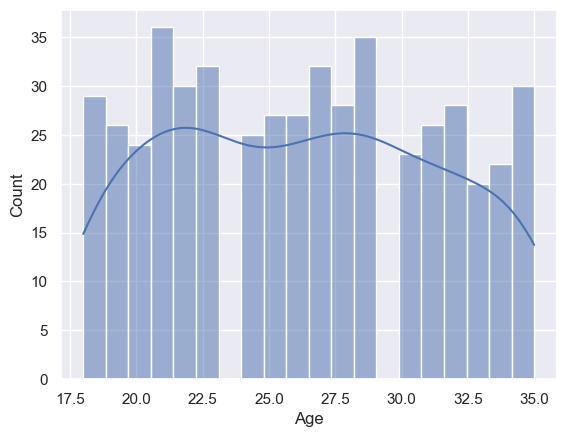

In [22]:
#Age distribution
df1 = sns.histplot(x = data['Age'], bins = 20, kde = True)
plt.show()

In [28]:
#Gender Distribution
df2 = data['Gender'].value_counts()
df2

Gender
Male      261
Female    239
Name: count, dtype: int64

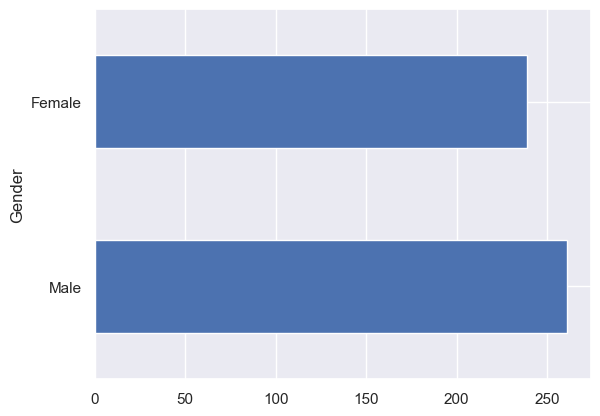

In [27]:
df2.plot(kind = 'barh')
plt.show()

# Analyzing Customer Behaviour

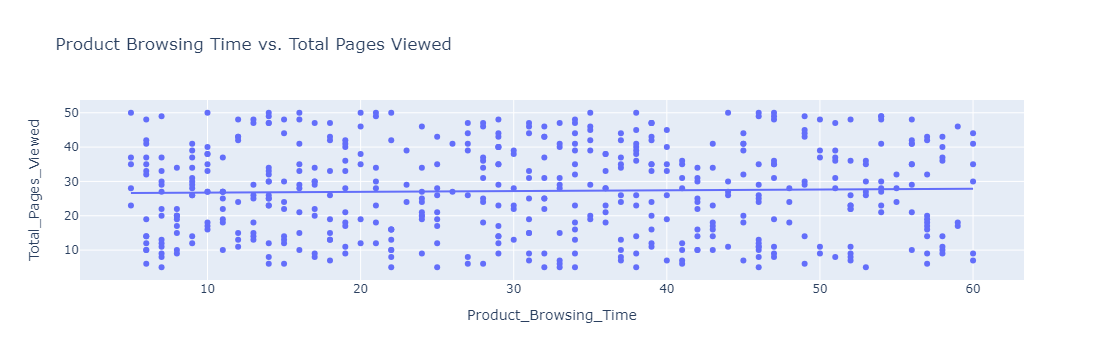

In [29]:
# 'Product_Browsing_Time' vs 'Total_Pages_Viewed'
fig = px.scatter(data, x='Product_Browsing_Time', y='Total_Pages_Viewed',
                 title='Product Browsing Time vs. Total Pages Viewed', 
                 trendline='ols')
fig.show()

In [31]:
# Average Total Pages viewed Gende Wise
df3 = data.groupby('Gender')['Total_Pages_Viewed'].mean().round(2)
df3

Gender
Female    27.58
Male      26.82
Name: Total_Pages_Viewed, dtype: float64

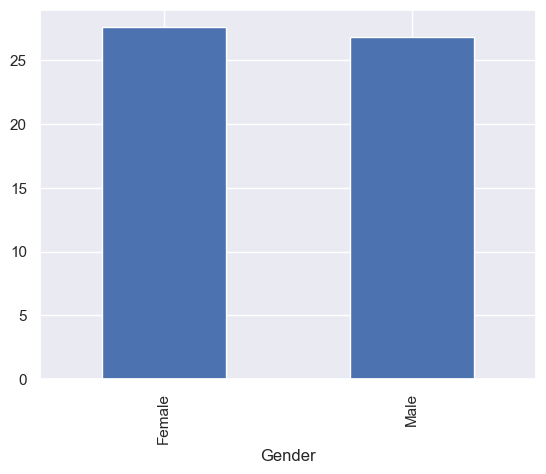

In [33]:
df3.plot(kind = 'bar')
plt.show()

In [35]:
# Average total pages viewed device wise
df4 = data.groupby('Device_Type')['Total_Pages_Viewed'].mean().round(2)
df4

Device_Type
Desktop    26.00
Mobile     27.79
Tablet     27.67
Name: Total_Pages_Viewed, dtype: float64

<Axes: xlabel='Device_Type'>

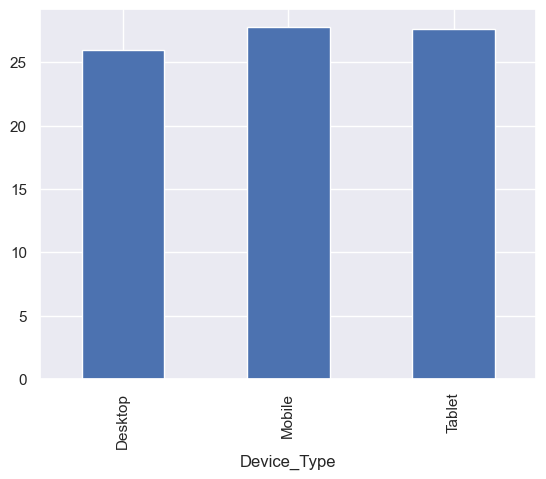

In [36]:
df4.plot(kind = 'bar')

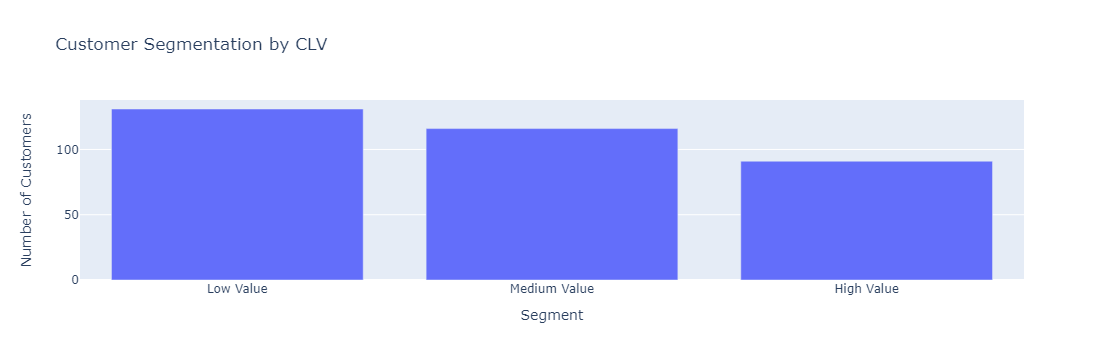

In [38]:
# customer lifetime value (CLV)
data['CLV'] = (data['Total_Purchases'] * data['Total_Pages_Viewed']) / data['Age']

data['Segment'] = pd.cut(data['CLV'], bins=[1, 2.5, 5, float('inf')],
                         labels=['Low Value', 'Medium Value', 'High Value'])

segment_counts = data['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

# Create a bar chart to visualize the customer segments
fig = px.bar(segment_counts, x='Segment', y='Count', 
             title='Customer Segmentation by CLV')
fig.update_xaxes(title='Segment')
fig.update_yaxes(title='Number of Customers')
fig.show()

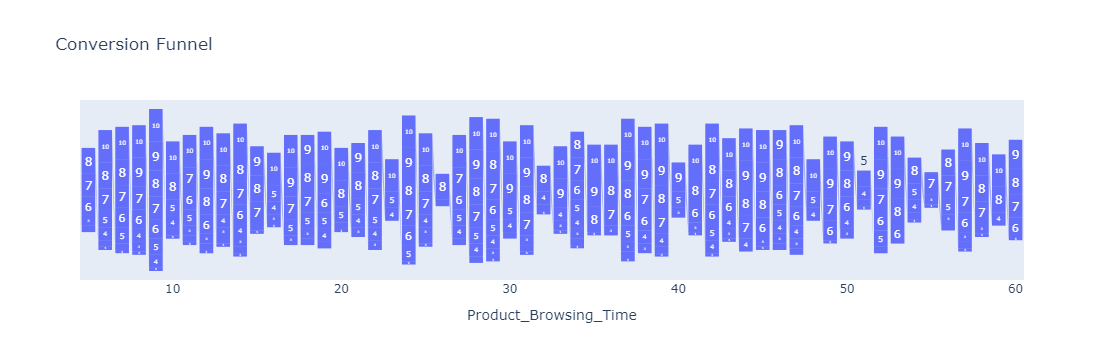

In [40]:
# conversion funnel of the customers
# Funnel analysis
funnel_data = data[['Product_Browsing_Time', 'Items_Added_to_Cart', 'Total_Purchases']]
funnel_data = funnel_data.groupby(['Product_Browsing_Time', 'Items_Added_to_Cart']).sum().reset_index()

fig = px.funnel(funnel_data, x='Product_Browsing_Time', y='Items_Added_to_Cart', title='Conversion Funnel')
fig.show()

In [42]:
# Calculate churn rate
data['Churned'] = data['Total_Purchases'] == 0

churn_rate = data['Churned'].mean()
print(churn_rate)

0.198
